### **문제 1) Tokenizer 생성하기**

**1-1. `preprocessing()`**

텍스트 전처리를 하는 함수입니다.

- input: 여러 영어 문장이 포함된 list 입니다. ex) ['I go to school.', 'I LIKE pizza!']
- output: 각 문장을 토큰화한 결과로, nested list 형태입니다. ex) [['i', 'go', 'to', 'school'], ['i', 'like', 'pizza']]
- 조건 1: 입력된 문장에 대해서 소문자로의 변환과 특수문자 제거를 수행합니다.
- 조건 2: 토큰화는 white space 단위로 수행합니다.
    
    

**1-2. `fit()`**

어휘 사전을 구축하는 함수입니다.

- input: 여러 영어 문장이 포함된 list 입니다. ex) ['I go to school.', 'I LIKE pizza!']
- 조건 1: 위에서 만든 `preprocessing` 함수를 이용하여 각 문장에 대해 토큰화를 수행합니다.
- 조건 2: 각각의 토큰을 정수 인덱싱 하기 위한 어휘 사전(`self.word_dict`)을 생성합니다.
    - 주어진 코드에 있는 `self.word_dict`를 활용합니다.
    

**1-3. `transform()`**

어휘 사전을 활용하여 입력 문장을 정수 인덱싱하는 함수입니다.

- input: 여러 영어 문장이 포함된 list입니다. ex) ['I go to school.', 'I LIKE pizza!']
- output: 각 문장의 정수 인덱싱으로, nested list 형태입니다. ex) [[1, 2, 3, 4], [1, 5, 6]]
- 조건 1: 어휘 사전(`self.word_dict`)에 없는 단어는 'oov'의 index로 변환합니다.

In [1]:
import string
class Tokenizer():
  def __init__(self):
    self.word_dict = {'oov': 0}
    self.fit_checker = False
  
  def preprocessing(self, sequences):
    result = []
    for sequence in sequences:
      sequence_rmv = ''.join(c for c in sequence if c not in string.punctuation)
      result.append(sequence_rmv.lower().split())
    return result
  
  def fit(self, sequences):
    self.fit_checker = False
    tokens = self.preprocessing(sequences)
    i = 1
    for one_tokens in tokens:
      for token in one_tokens:
        if token not in self.word_dict.keys():
          self.word_dict[token]= i
          i += 1
    self.fit_checker = True
  
  def transform(self, sequences):
    result = []
    tokens = self.preprocessing(sequences)
    if self.fit_checker:
      for t in tokens:
        result.append([self.word_dict[index] if index in self.word_dict.keys() else self.word_dict['oov'] for index in t])
      return result
    else:
      raise Exception("Tokenizer instance is not fitted yet.")
      
  def fit_transform(self, sequences):
    self.fit(sequences)
    result = self.transform(sequences)
    return result

In [2]:
a = Tokenizer()
a.fit_transform(['I go to school.', 'I LIKE pizza!'])

[[1, 2, 3, 4], [1, 5, 6]]

### **문제 2) TfidfVectorizer 생성하기**

**2-1. `fit()`**

입력 문장들을 이용해 IDF 행렬을 만드는 함수입니다.

- input: 여러 영어 문장이 포함된 list 입니다. ex) ['I go to school.', 'I LIKE pizza!']
- 조건 1: IDF 행렬은 list 형태입니다.
    - ex) [토큰1에 대한 IDF 값, 토큰2에 대한 IDF 값, .... ]
- 조건 2: IDF 값은 아래 식을 이용해 구합니다.
   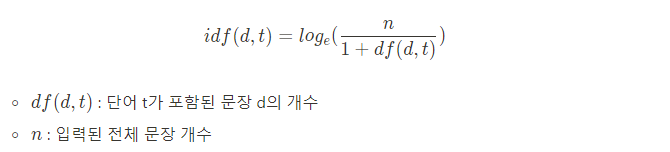
- 조건 3: 입력된 문장의 토큰화에는 문제 1에서 만든 Tokenizer를 사용합니다.
    
    

**2-2. `transform()`**

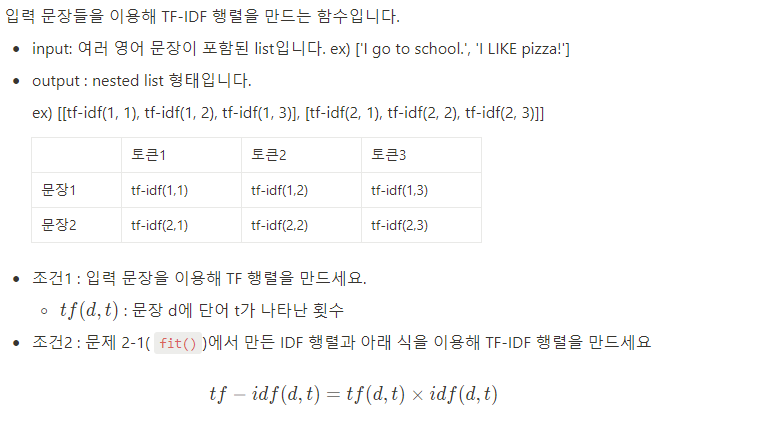

In [3]:
import math
class TfidfVectorizer:
  def __init__(self, tokenizer):
    self.tokenizer = tokenizer
    self.fit_checker = False
    self.idf = []
    self.tfidf_matrix = []
  
  def fit(self, sequences):
    tokenized = self.tokenizer.fit_transform(sequences)
    word_dict = self.tokenizer.word_dict
    n = len(tokenized)
    for w in word_dict.values():
      cnt = 0
      for t in tokenized:
          if w in t:
            cnt += 1
      self.idf.append(math.log(n / (1 + cnt)))
    self.fit_checker = True

  def transform(self, sequences):
    if self.fit_checker:
      tokenized = self.tokenizer.transform(sequences)
      for tok in tokenized:
        self.tfidf_matrix.append([tok.count(t) * self.idf[t] for t in tok])
      return self.tfidf_matrix
    else:
      raise Exception("TfidfVectorizer instance is not fitted yet.")
  
  def fit_transform(self, sequences):
    self.fit(sequences)
    return self.transform(sequences)

In [4]:
a1 = TfidfVectorizer(Tokenizer())
a1.fit_transform(['I go to school.', 'I LIKE pizza!'])

[[-0.40546510810816444, 0.0, 0.0, 0.0], [-0.40546510810816444, 0.0, 0.0]]

## 사용 권장 기술

- 사용 언어: Python (필수)
- 외부 라이브러리 사용은 자유이나, output의 type은 문제에 명시된 조건을 따라야 합니다.